In [1]:
import pandas as pd 
import plotly.express as px

In [2]:
df = pd.read_csv('bikes.csv')
df.head(3)

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0,8,32,40
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0,5,27,32


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            10886 non-null  object 
 1   season              10672 non-null  object 
 2   holiday             10030 non-null  float64
 3   workingday          9388 non-null   float64
 4   weather             8746 non-null   object 
 5   temp                8104 non-null   float64
 6   humidity            7462 non-null   float64
 7   windspeed           6820 non-null   float64
 8   casual              10886 non-null  int64  
 9   registered          10886 non-null  int64  
 10  rented_bikes_count  10886 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 935.6+ KB


In [4]:
df.describe()

,holiday,workingday,temp,humidity,windspeed,casual,registered,rented_bikes_count
count,10030.000000,9388.000000,8104.000000,7462.000000,6820.000000,10886.000000,10886.000000,10886.000000
mean,0.029113,0.678206,20.317665,61.790673,12.708806,36.021955,155.552177,191.574132
std,0.168131,0.467189,7.818568,19.262084,8.131154,49.960477,151.039033,181.144454
min,0.000000,0.000000,0.820000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,0.000000,1.000000,20.500000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,0.000000,1.000000,26.240000,77.000000,16.997900,49.000000,222.000000,284.000000
max,1.000000,1.000000,41.000000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
df.describe(include='object').drop(['datetime'], axis=1)

,season,weather
count,10672,8746
unique,4,4
top,Winter,Clear
freq,2688,5793


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'casual', 'registered', 'rented_bikes_count'],
      dtype='object')

In [8]:
cat_col = df.select_dtypes(include='object').drop(['datetime'], axis = 1).columns
cat_col 

Index(['season', 'weather'], dtype='object')

In [9]:
for col in cat_col:

    print(col)
    print(df[col].nunique())
    print(df[col].unique())
    print('#'*50)

season
4
['Spring' nan 'Summer' 'Fall' 'Winter']
##################################################
weather
4
['Clear' nan 'Mist' 'Rainy' 'Snowy']
##################################################


In [10]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month_name()
df['day name'] = df['datetime'].dt.day_name()
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

In [12]:
df.head(3)

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,year,month,day name,day,hour
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,2011,January,Saturday,1,0
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0,8,32,40,2011,January,Saturday,1,1
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0,5,27,32,2011,January,Saturday,1,2


In [13]:
num_col = df.select_dtypes(include = [float, int]).columns
num_col

Index(['holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'casual',
       'registered', 'rented_bikes_count', 'year', 'day', 'hour'],
      dtype='object')

In [14]:
df.holiday.unique()

array([ 0., nan,  1.])

In [15]:
for col in num_col:

    px.histogram(data_frame = df, x = col).show()

In [16]:
df.head(3)

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,year,month,day name,day,hour
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,2011,January,Saturday,1,0
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0,8,32,40,2011,January,Saturday,1,1
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0,5,27,32,2011,January,Saturday,1,2


##### Some Analysis Questions

In [20]:
# which season has the most rentals 

df.groupby(['season'])['rented_bikes_count'].sum().sort_values(ascending= False).head(1)

season
Fall    628384
Name: rented_bikes_count, dtype: int64

In [23]:
# which 3 hours have the most rentals 

df.groupby(['hour'])['rented_bikes_count'].sum().sort_values(ascending= False).head(3)

hour
17    213757
18    196472
8     165060
Name: rented_bikes_count, dtype: int64

In [ ]:
# which weather has the most rentals / How do weather conditions affect rentals?

df.groupby(['weather'])['rented_bikes_count'].sum().sort_values(ascending= False)

weather
Clear    1182406
Mist      405992
Rainy      82288
Snowy        164
Name: rented_bikes_count, dtype: int64

In [28]:
# what is the average of temperature each season

df.groupby(['weather'])['temp'].mean().sort_values(ascending= False)

weather
Clear    20.625236
Mist     19.760527
Rainy    19.727674
Snowy     8.200000
Name: temp, dtype: float64

In [31]:
# which month has the most rentals 

df.groupby(['month'])['rented_bikes_count'].sum().sort_values(ascending= False).head(1)

month
June    220733
Name: rented_bikes_count, dtype: int64

In [34]:
# which day has the most rentals 

df.groupby(['day name'])['rented_bikes_count'].sum().sort_values(ascending= False).head(1)

day name
Saturday    311518
Name: rented_bikes_count, dtype: int64

In [43]:
# Is there a correlation between temperature and rental count?

correlation = df.corr(numeric_only= True)
correlation

,holiday,workingday,temp,humidity,windspeed,casual,registered,rented_bikes_count,year,day,hour
holiday,1.000000,-0.249189,-0.001047,0.016190,0.010463,0.042519,-0.021017,-0.005827,0.010191,-0.015380,0.001522
workingday,-0.249189,1.000000,0.018954,-0.019167,0.020668,-0.318348,0.118612,0.010940,-0.008233,0.008556,0.004650
temp,-0.001047,0.018954,1.000000,-0.068240,-0.025425,0.466035,0.315430,0.391867,0.055869,0.014473,0.147415
humidity,0.016190,-0.019167,-0.068240,1.000000,-0.312628,-0.344939,-0.266432,-0.317282,-0.080117,-0.016969,-0.287224
windspeed,0.010463,0.020668,-0.025425,-0.312628,1.000000,0.085055,0.089105,0.097747,-0.019098,0.037623,0.145908
casual,0.042519,-0.318348,0.466035,-0.344939,0.085055,1.000000,0.497250,0.690414,0.145241,0.014109,0.302045
registered,-0.021017,0.118612,0.315430,-0.266432,0.089105,0.497250,1.000000,0.970948,0.264265,0.019111,0.380540
rented_bikes_count,-0.005827,0.010940,0.391867,-0.317282,0.097747,0.690414,0.970948,1.000000,0.260403,0.019826,0.400601
year,0.010191,-0.008233,0.055869,-0.080117,-0.019098,0.145241,0.264265,0.260403,1.000000,0.001800,-0.004234
day,-0.015380,0.008556,0.014473,-0.016969,0.037623,0.014109,0.019111,0.019826,0.001800,1.000000,0.001132


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

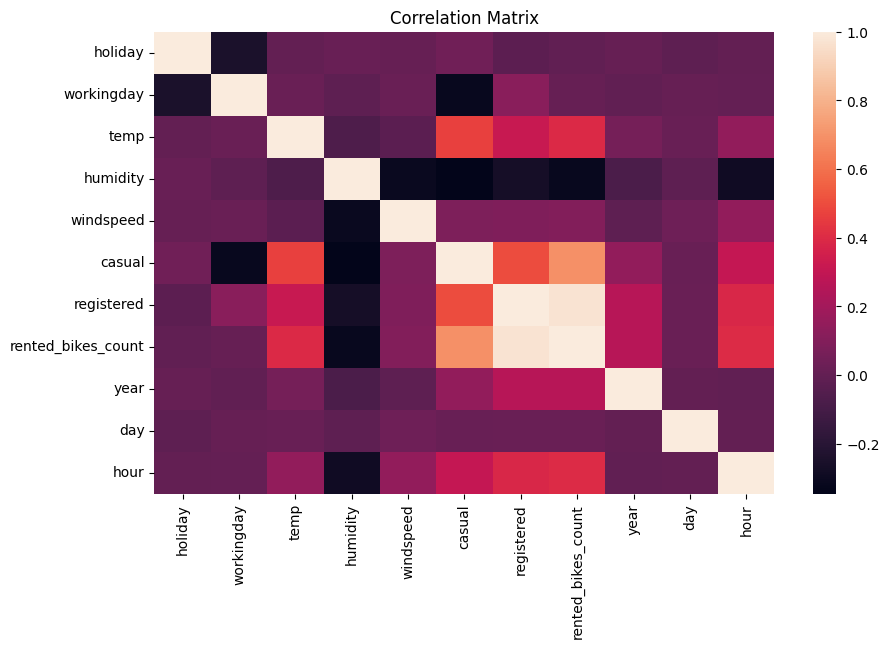

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation)
plt.title("Correlation Matrix")
plt.show()

#### Handling Missing Values

In [62]:
df.isna().mean().round(2) * 100

datetime               0.0
season                 0.0
holiday                8.0
workingday            14.0
weather               20.0
temp                  26.0
humidity              32.0
windspeed             37.0
casual                 0.0
registered             0.0
rented_bikes_count     0.0
year                   0.0
month                  0.0
day name               0.0
day                    0.0
hour                   0.0
dtype: float64

In [60]:
(df.dropna().shape[0] / df.shape[0]) * 100

19.99816277787985

In [61]:
df.dropna(subset= ['season'], inplace= True, ignore_index= True)

In [66]:
px.histogram(df, x = 'holiday')

In [104]:
df.holiday = df.holiday.fillna(df.holiday.mode()[0])

In [105]:
df.workingday = df.workingday.fillna(df.workingday.mode()[0])

In [106]:
df.workingday.median()

1.0

In [107]:
df.weather = df.weather.fillna(df.weather.mode()[0])

In [83]:
df.weather.mode()[0]

'Clear'

In [93]:
px.histogram(df, x = 'temp')

In [108]:
df.humidity = df.humidity.fillna(df.humidity.median())

In [110]:
from sklearn.impute import KNNImputer

knn = KNNImputer()

df.windspeed = knn.fit_transform(df[['windspeed']])
df.temp = knn.fit_transform(df[['temp']])

In [112]:
df[['temp']]

,temp
0,9.840000
1,9.020000
2,9.020000
3,9.840000
4,20.299854
...,...
10667,15.580000
10668,15.580000
10669,14.760000
10670,13.940000


In [111]:
df.isna().sum()

datetime              0
season                0
holiday               0
workingday            0
weather               0
temp                  0
humidity              0
windspeed             0
casual                0
registered            0
rented_bikes_count    0
year                  0
month                 0
day name              0
day                   0
hour                  0
dtype: int64

### Uni Variate Analysis

In [47]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'casual', 'registered', 'rented_bikes_count',
       'year', 'month', 'day name', 'day', 'hour'],
      dtype='object')

In [113]:
# What is the distribution of daily bike rentals (count)?

px.histogram(data_frame= df, x = 'rented_bikes_count')

In [156]:
# Which season has the highest number of bike rentals?

px.pie(df, names='season')

In [115]:
# What is the distribution of temperature throughout the dataset?

px.histogram(data_frame= df, x = 'temp')

In [116]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'casual', 'registered', 'rented_bikes_count',
       'year', 'month', 'day name', 'day', 'hour'],
      dtype='object')

In [117]:
# How many rentals occur on working days vs. weekends?

px.pie(df, names= 'workingday')

### Bi varite 


In [120]:
# Is there a correlation between temperature and rental count?

px.scatter(df, x = 'temp', y = 'rented_bikes_count')

<Axes: xlabel='workingday', ylabel='rented_bikes_count'>

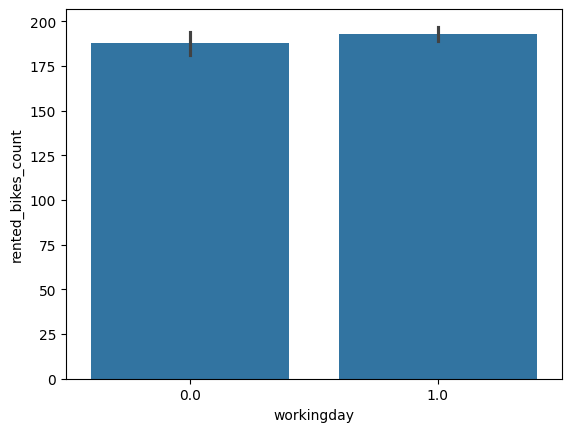

In [126]:
# Do people rent more bikes on working days or non-working days?

sns.barplot(df, x = 'workingday', y  = 'rented_bikes_count')

In [127]:
px.bar(df, x = 'workingday', y = 'rented_bikes_count')

In [128]:
# How do humidity levels impact rental count? 

px.scatter(df, x = 'humidity', y = 'rented_bikes_count')

In [ ]:
# Does windspeed affect the number of rentals?

px.scatter(df, x = 'windspeed', y = 'rented_bikes_count')

In [ ]:
px.bar()

In [132]:
# What is the average rental count for each season?

px.bar(df, x = 'season', y = 'rented_bikes_count', color= 'temp')

In [133]:
# What’s the average count for each day of the week?

px.bar(df, x = 'day name', y = 'rented_bikes_count')

#### Multi Variate


In [135]:
# How does temperature and humidity together impact rental count? 

px.scatter(df, x = 'humidity', y = 'temp')

In [136]:
df.to_csv('cleaned.csv')

In [166]:
%%writefile app.py

import streamlit as st
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


st.set_page_config(layout = 'wide', page_title = 'Bikes Rental EDA')

st.write('# Welcome To the Analysis of the Bikes Rental Dataset!')

st.image('https://miro.medium.com/v2/resize:fit:793/0*9AfBNIW4lnK_7wOt.jpg')

df = pd.read_csv('cleaned.csv', index_col= 0)
st.dataframe(df.head(4))

page = st.sidebar.selectbox('Analysis category', ['Univariate Analysis', 'Bivariate Analysis', 'Multivariate'])

if page == 'Univariate Analysis':

    col = st.selectbox('Select Column', df.columns)
    
    chart = st.selectbox('Select Chart', ['Histogram', 'Box', 'Pie'])

    if chart == 'Histogram':
        st.plotly_chart(px.histogram(df, x = col, title= col))

    elif chart == 'Box':
        st.plotly_chart(px.box(data_frame= df, x= col, title= col))

    elif chart == 'Pie':
        st.plotly_chart(px.pie(data_frame= df, names= col, title= col))
    

    st.write('# Some Analysis Questions to check!')

    st.header('Q1: What is the distribution of daily bike rentals (count)?')  
    st.plotly_chart(px.histogram(data_frame= df, x = 'rented_bikes_count'))
    
    st.header('Q2: Which season has the highest number of bike rentals?')  
    st.plotly_chart(px.pie(data_frame= df, names = 'season'))

    st.header('Q3:  How many rentals occur on working days vs. weekends? ')  
    st.plotly_chart(px.pie(data_frame= df, names = 'workingday'))

    st.header('Q4: What is the distribution of tempreture?')  
    st.plotly_chart(px.histogram(data_frame= df, x = 'temp'))
#


elif page == 'Bivariate Analysis':


    col_1 = st.selectbox('Select the first Column', df.columns)
    col_2 = st.selectbox('Select the second Column', df.columns)

    chart = st.selectbox('Select Chart', ['Scatter', 'Box', 'Bar'])

    if chart == 'Scatter':
        st.plotly_chart(px.scatter(df, x = col_1, y = col_2))

    elif chart == 'Box':
        st.plotly_chart(px.box(df, x = col_1, y = col_2))

    elif chart == 'Bar':
        st.plotly_chart(px.bar(df, x = col_1, y = col_2))    


    st.write('# Some Analysis Questions to check!')

    st.header('Q1: Is there a correlation between temperature and rental count?')  
    st.plotly_chart(px.scatter(df, x = 'temp', y = 'rented_bikes_count'))
    

    st.header('Q2: Do people rent more bikes on working days or non-working days?')  
    st.plotly_chart(px.scatter(df, x = 'workingday', y = 'rented_bikes_count'))

    st.header('Q3: How do humidity levels impact rental count? ')  
    st.plotly_chart(px.scatter(df, x = 'humidity', y = 'rented_bikes_count'))

    st.header('Q4: What is the average count for each day of the week?')  
    st.plotly_chart(px.scatter(df, x = 'day name', y = 'rented_bikes_count'))
    

elif page == 'Multivariate':
    
    st.header('Q1: Show The correlation between all columns with the bike rental')  
    correlation = df.corr(numeric_only= True)
    fig, ax = plt.subplots()
    sns.heatmap(correlation, ax=ax)
    st.pyplot(fig)

    st.header('Q2: How does temperature and humidity together impact rental count?')
    st.plotly_chart(px.scatter(df, x = 'humidity', y = 'temp'))

Overwriting app.py


In [139]:
! streamlit run app.py

^C
